In [2]:
import pandas as pd

# Load the dataset
file_path = 'extracted_combined.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(), data.columns


(              author                                          statement
 0       Franz_Werfel  the famers protests on the continent were abou...
 1         lamahorses      Over 30% of the European budget is on CAP etc
 2  ConnolysMoustache  What are they even protesting?\n\nThe IFA repr...
 3            bintags                     These people are brainwashed. 
 4  gofuckyoureself21  Stop bitching at each other and get out and su...,
 Index(['author', 'statement'], dtype='object'))

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sid.polarity_scores(text)

# Apply the sentiment analysis
data['sentiment'] = data['statement'].apply(get_sentiment_scores)

# Expand sentiment scores into separate columns
sentiment_df = pd.json_normalize(data['sentiment'])
data = data.join(sentiment_df)

# Display the first few rows of the dataset with sentiment scores
data.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ricardo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,author,statement,sentiment,neg,neu,pos,compound
0,Franz_Werfel,the famers protests on the continent were abou...,"{'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'comp...",0.133,0.867,0.000,-0.6808
1,lamahorses,Over 30% of the European budget is on CAP etc,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,ConnolysMoustache,What are they even protesting?\n\nThe IFA repr...,"{'neg': 0.148, 'neu': 0.697, 'pos': 0.156, 'co...",0.148,0.697,0.156,-0.3632
3,bintags,These people are brainwashed.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,gofuckyoureself21,Stop bitching at each other and get out and su...,"{'neg': 0.195, 'neu': 0.682, 'pos': 0.123, 'co...",0.195,0.682,0.123,-0.1531


In [4]:
from textblob import TextBlob

# Function to get sentiment polarity and subjectivity
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Apply the TextBlob sentiment analysis
data['textblob_sentiment'] = data['statement'].apply(get_textblob_sentiment)

# Expand the sentiment into separate columns
data[['polarity', 'subjectivity']] = data['textblob_sentiment'].apply(lambda x: pd.Series([x.polarity, x.subjectivity]))

# Display the first few rows of the dataset with TextBlob sentiment scores
data.head()


,author,statement,sentiment,neg,neu,pos,compound,textblob_sentiment,polarity,subjectivity
0,Franz_Werfel,the famers protests on the continent were abou...,"{'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'comp...",0.133,0.867,0.000,-0.6808,"(0.0, 0.5)",0.00000,0.500000
1,lamahorses,Over 30% of the European budget is on CAP etc,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"(0.0, 0.0)",0.00000,0.000000
2,ConnolysMoustache,What are they even protesting?\n\nThe IFA repr...,"{'neg': 0.148, 'neu': 0.697, 'pos': 0.156, 'co...",0.148,0.697,0.156,-0.3632,"(0.043750000000000004, 0.6854166666666666)",0.04375,0.685417
3,bintags,These people are brainwashed.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"(0.0, 0.0)",0.00000,0.000000
4,gofuckyoureself21,Stop bitching at each other and get out and su...,"{'neg': 0.195, 'neu': 0.682, 'pos': 0.123, 'co...",0.195,0.682,0.123,-0.1531,"(-0.125, 0.375)",-0.12500,0.375000


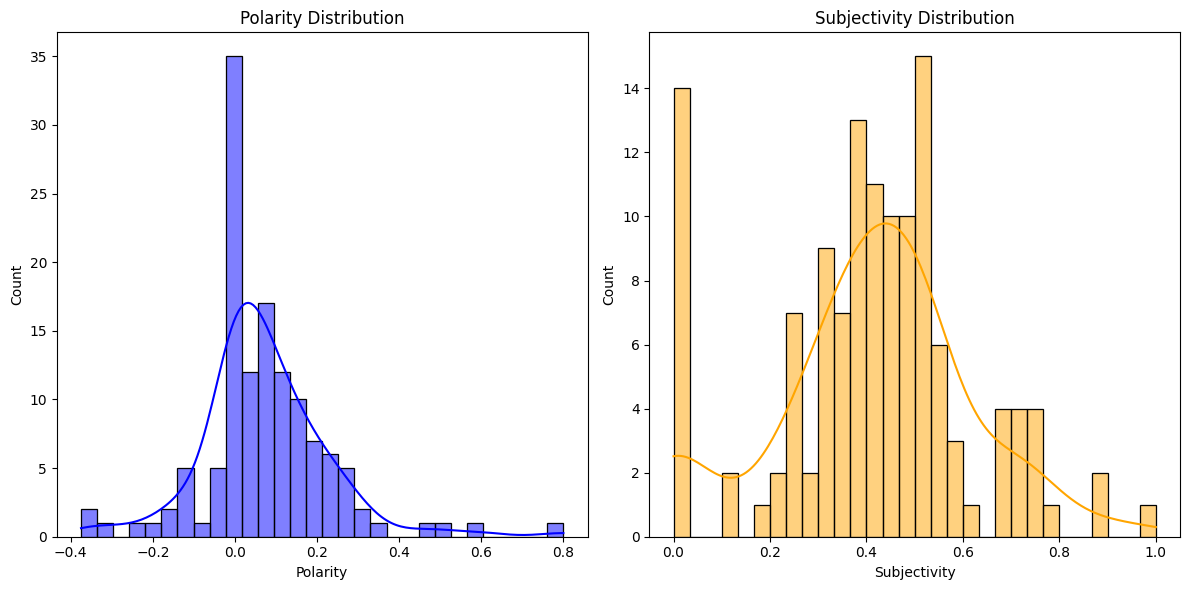

(None,
          polarity  subjectivity
 count  129.000000    129.000000
 mean     0.071990      0.409139
 std      0.156366      0.207902
 min     -0.375000      0.000000
 25%      0.000000      0.310606
 50%      0.052000      0.419643
 75%      0.141667      0.512352
 max      0.800000      1.000000)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for sentiment scores
sentiment_summary = data[['polarity', 'subjectivity']].describe()

# Plotting the distribution of polarity and subjectivity
plt.figure(figsize=(12, 6))

# Polarity distribution
plt.subplot(1, 2, 1)
sns.histplot(data['polarity'], bins=30, kde=True, color='blue')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')

# Subjectivity distribution
plt.subplot(1, 2, 2)
sns.histplot(data['subjectivity'], bins=30, kde=True, color='orange')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')

plt.tight_layout()
plt.show(), sentiment_summary
